---

# **Comparação Ação vs. BDR - automatização de geração de relatório PDF**



## *Por que investir em BDRs?*

### *BDR:*

<br>

- *BDR, ou Brazilian Depositary Receipt, é um instrumento financeiro que permite aos investidores brasileiros acessarem ações de empresas estrangeiras listadas em mercados internacionais. Em essência, os BDRs funcionam como uma espécie de "certificado" que representa a propriedade de ações de uma empresa estrangeira, mas são negociados no mercado brasileiro.*

<br>

- *Quando uma empresa estrangeira deseja listar suas ações no Brasil através de BDRs, ela emite esses recibos depositários para uma instituição depositária brasileira. Essa instituição então custodia as ações da empresa estrangeira e emite os BDRs correspondentes, que são negociados na Bolsa de Valores brasileira.*



---

<br>

### *Será que investir em BDR trás benefícios a investidor, ou é melhor se expor ao câmbio e investir diretamente no exterior?*

<br>

---

# *Passo a Passo:*

1. Instalação e Importação das bibliotecas
2. Captura dos dados
3. Criando função para análise de várias janelas de tempo
4. Criando loop para geração do relatório
5. Mensurar o impacto do câmbio

## *1. Instalação e Importação das bibliotecas*

In [1]:
# Instalações
!pip install pandas
!pip install yfinance
!pip install matplotlib

In [82]:
# Importações
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import plotly.graph_objects as go

## *2. Captura dos dados*

In [10]:
jp_morgan = yf.download(['JPMC34.SA','JPM'], start = '2020-01-01')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [11]:
jp_morgan.head()

Ticker,JPM,JPMC34.SA
Date,,
2020-01-02,124.254189,50.645817
2020-01-03,122.614494,50.608608
2020-01-06,122.516998,50.393463
2020-01-07,120.434113,49.889668
2020-01-08,121.373642,50.020542


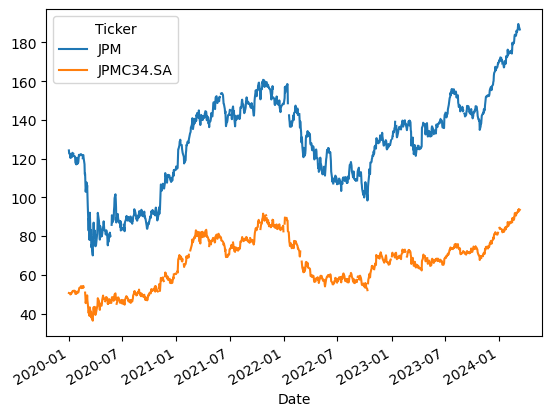

In [12]:
jp_morgan.plot();

In [13]:
# Preenchendo dados faltantes 
jp_morgan = jp_morgan.ffill(axis = 0)

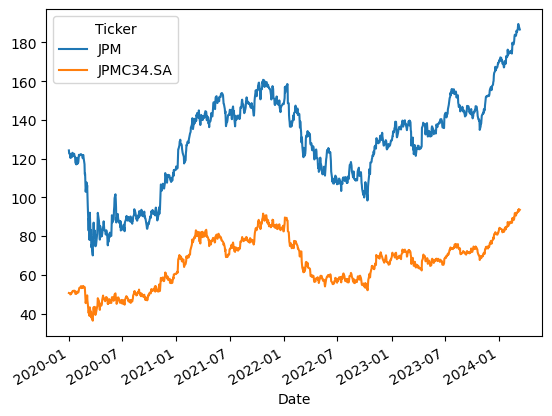

In [14]:
jp_morgan.plot();

In [18]:
# Normalizando os dados
jp_morgan_normalizado = jp_morgan/jp_morgan.iloc[0]

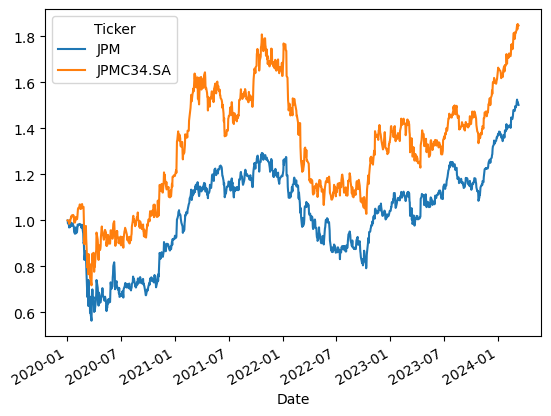

In [19]:
jp_morgan_normalizado.plot();

## *3. Criando função para análise de várias janelas de tempo*

In [30]:
def compara_ativos(inicio):
    dados = jp_morgan = yf.download(['JPMC34.SA','JPM'], start = inicio, progress = False)['Adj Close']
    dados = dados.dropna()
    dados = dados/dados.iloc[0]
    dados.plot();

## *4. Criando loop para geração do relatório*

In [33]:
datas = ['2023-01-01', '2022-01-01', '2021-01-01', '2020-01-01','2019-01-01', '2018-01-01']

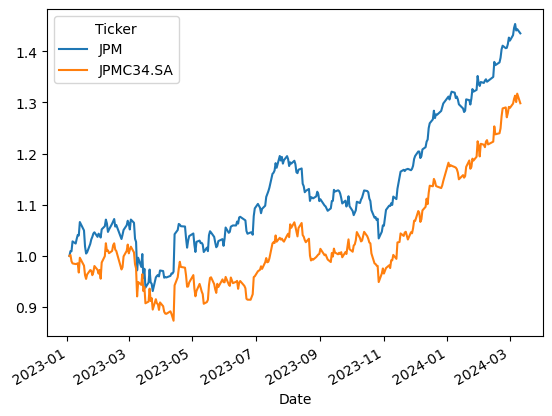

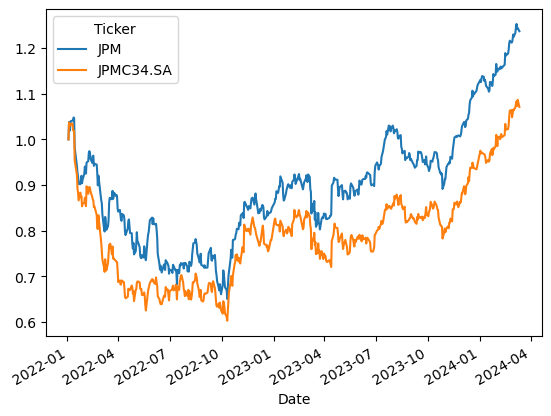

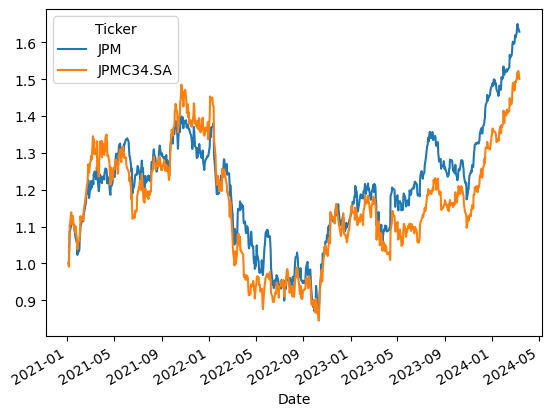

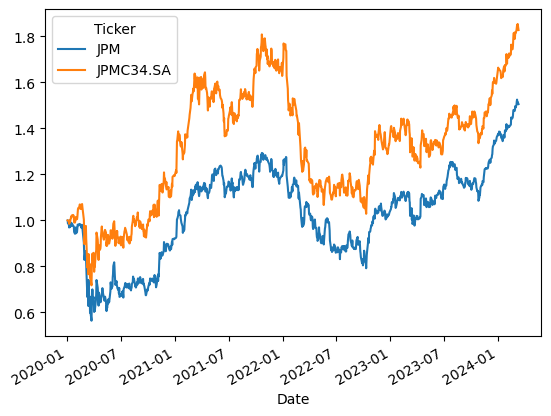

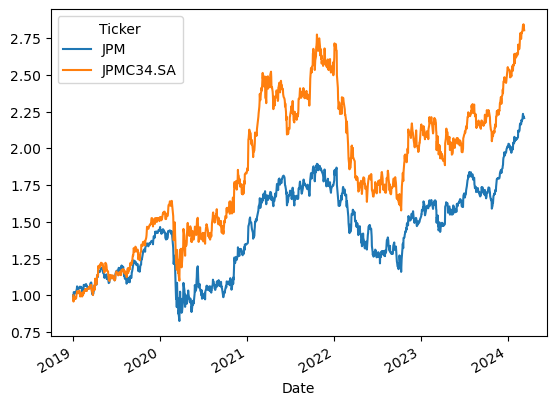

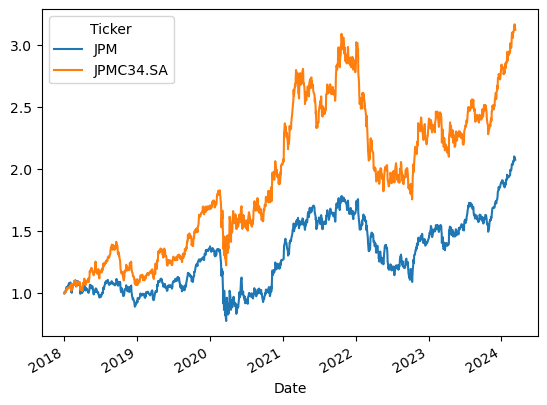

In [35]:
relatorio = PdfPages('Report_acao_vs_bdr.pdf')

for data in datas:
    relatorio.savefig(compara_ativos(data))
relatorio.close()

## *5. Mensurar o impacto do câmbio*

In [85]:
data = yf.download(['JPMC34.SA','JPM','USDBRL=X'], start = '2015-01-01')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [86]:
data.head()

Ticker,JPM,JPMC34.SA,USDBRL=X
Date,,,
2015-01-01,NaN,NaN,2.6542
2015-01-02,48.549873,13.257543,2.6532
2015-01-05,47.042648,13.040544,2.6912
2015-01-06,45.822872,12.666292,2.7031
2015-01-07,45.892807,12.650567,2.6966


In [87]:
data = data.ffill(axis = 0)

In [88]:
data.dropna(inplace = True)

In [89]:
data.head()

Ticker,JPM,JPMC34.SA,USDBRL=X
Date,,,
2015-01-02,48.549873,13.257543,2.6532
2015-01-05,47.042648,13.040544,2.6912
2015-01-06,45.822872,12.666292,2.7031
2015-01-07,45.892807,12.650567,2.6966
2015-01-08,46.918339,12.650567,2.6808


In [90]:
# Encontrar o preço de JP Morgan em Reais (R$)
data['JPM_reais'] = data['JPM'] * data['USDBRL=X']

In [91]:
data

Ticker,JPM,JPMC34.SA,USDBRL=X,JPM_reais
Date,,,,
2015-01-02,48.549873,13.257543,2.6532,128.812520
2015-01-05,47.042648,13.040544,2.6912,126.601176
2015-01-06,45.822872,12.666292,2.7031,123.863804
2015-01-07,45.892807,12.650567,2.6966,123.754542
2015-01-08,46.918339,12.650567,2.6808,125.778681
...,...,...,...,...
2024-03-05,188.550003,93.199997,4.9449,932.360917
2024-03-06,189.529999,93.639999,4.9571,939.519141
2024-03-07,187.869995,92.750000,4.9436,928.754141


In [92]:
# Normalizar o DataFrame
data_normalizados = data/data.iloc[0]

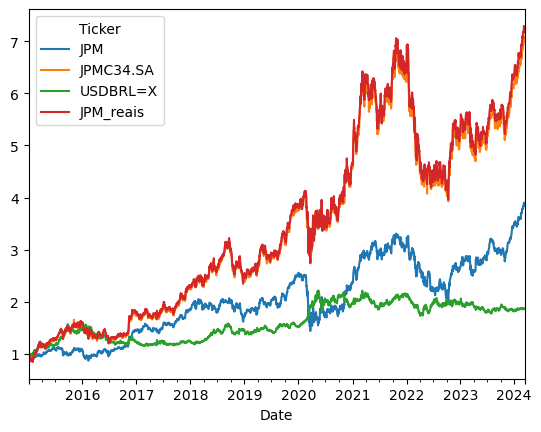

In [93]:
data_normalizados.plot();

## Vizualização Interativa

In [94]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_normalizados.index, y=data_normalizados['JPM'], mode='lines', name='JPM(U$)'))
fig.add_trace(go.Scatter(x=data_normalizados.index, y=data_normalizados['JPMC34.SA'], mode='lines', name='JPMC34'))
fig.add_trace(go.Scatter(x=data_normalizados.index, y=data_normalizados['USDBRL=X'], mode='lines', name='Dólar'))
fig.add_trace(go.Scatter(x=data_normalizados.index, y=data_normalizados['JPM_reais'], mode='lines', name='JPM_reais(R$)'))

# Configurando o layout do gráfico
fig.update_layout(
    title="Comparação de Dados",
    xaxis_title="Data",
    yaxis_title="Valor",
    legend_title="Ticker",
    hovermode="x",
    template="plotly_dark"
)

# Exibindo o gráfico
fig.show()